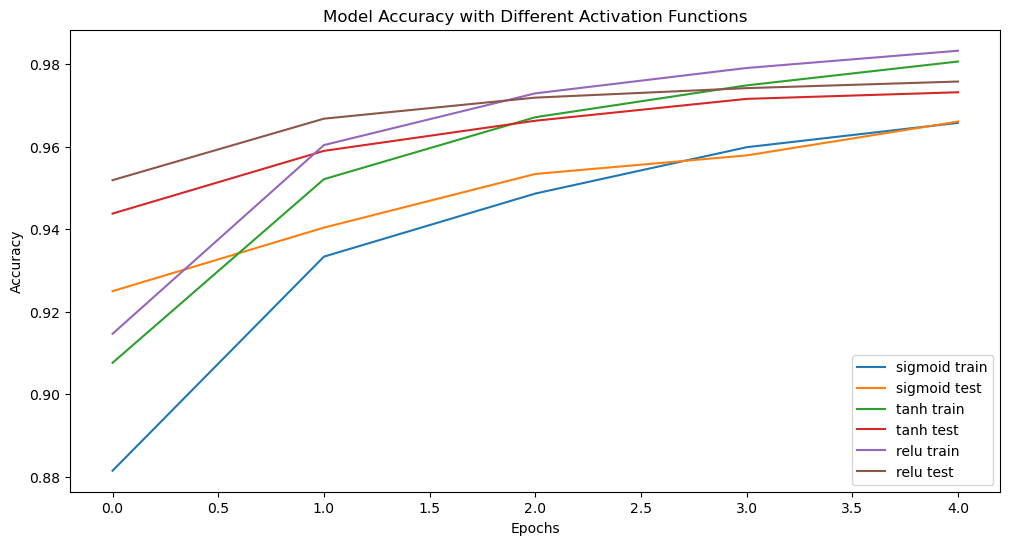

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Function to create a neural network with different activation functions
def create_model(activation_func):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(128, activation=activation_func))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and evaluate the model with different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu']
results = {}

for activation_func in activation_functions:
    model = create_model(activation_func)
    history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels), verbose=0)
    results[activation_func] = history.history

# Plot the training and validation accuracy for each activation function
plt.figure(figsize=(12, 6))
for activation_func, history in results.items():
    plt.plot(history['accuracy'], label=f'{activation_func} train')
    plt.plot(history['val_accuracy'], label=f'{activation_func} test')

plt.title('Model Accuracy with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()